In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("scikit-learn-mooc/datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf")  
)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

cv = ShuffleSplit(random_state=0)

scores = cross_validate(
    model,data,target,cv=cv,
    scoring="accuracy"
)["test_score"]

print(f"CV accuracy: {scores.mean():.3f} ± {scores.std():.3f}")


CV accuracy: 0.765 ± 0.041


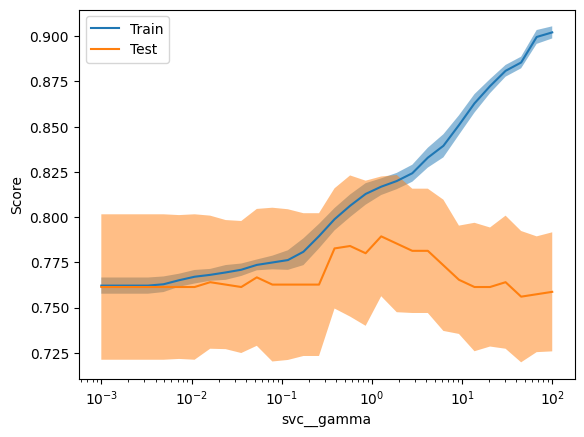

In [17]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

gamma_range = np.logspace(-3, 2, num=30)

ValidationCurveDisplay.from_estimator(
    model,data,target,
    param_name="svc__gamma",
    param_range=gamma_range,
    cv=cv,
)


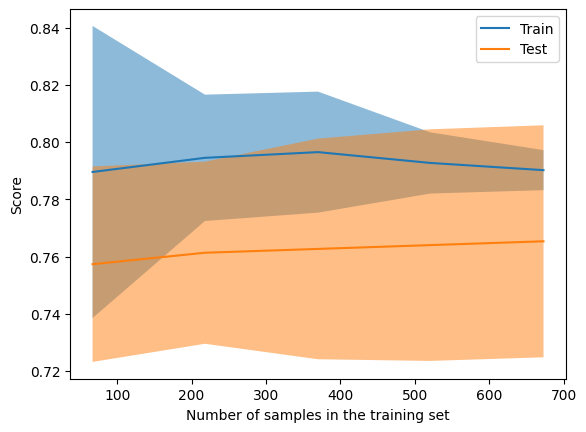

In [19]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(
    model,
    data,
    target,
    cv=cv,
)